In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [6]:
# Code starts here

# load data
df = pd.read_csv("train.csv")

# Converting date attribute from string to datetime.date datatype 
df['date'] = pd.to_datetime(df['date'])

# # calculate the total length of word
df['length'] = df['verified_reviews'].apply(len)

df.head()
# # Code ends here

,Id,rating,date,variation,verified_reviews,feedback,length
0,1916,5,2018-07-26,White Plus,I love it. Use it mostly for the music huge re...,1,69
1,500,5,2018-06-24,Black,There's really no dislike for Alexa( dot) I th...,1,169
2,2958,5,2018-07-30,Black Dot,I love searching the Alexa skill shop on the a...,1,255
3,1968,5,2018-07-25,White Plus,I love my Echo Plus and have cousins from Ital...,1,190
4,156,4,2018-07-30,Charcoal Fabric,i have not found a way to access my echo thoro...,1,522


### Visualize and Preprocess the data

- Visualize the different features of your interest
- Retaining only alphabets (Using regular expressions)
- Removing stopwords (Using nltk library)

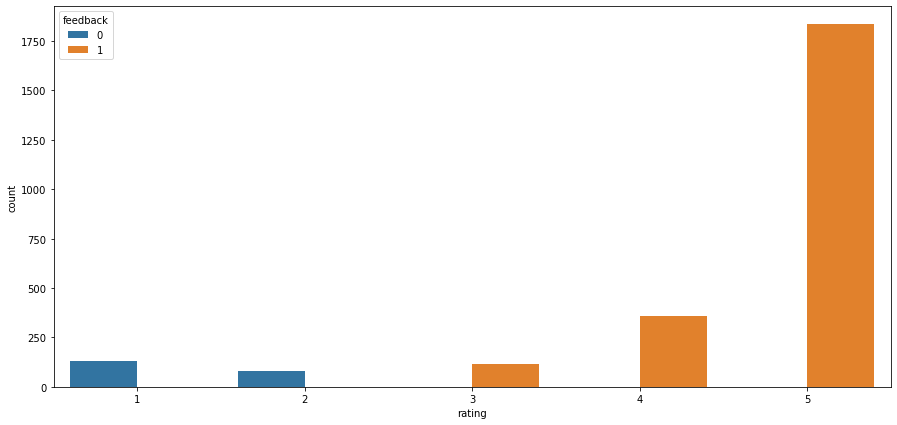

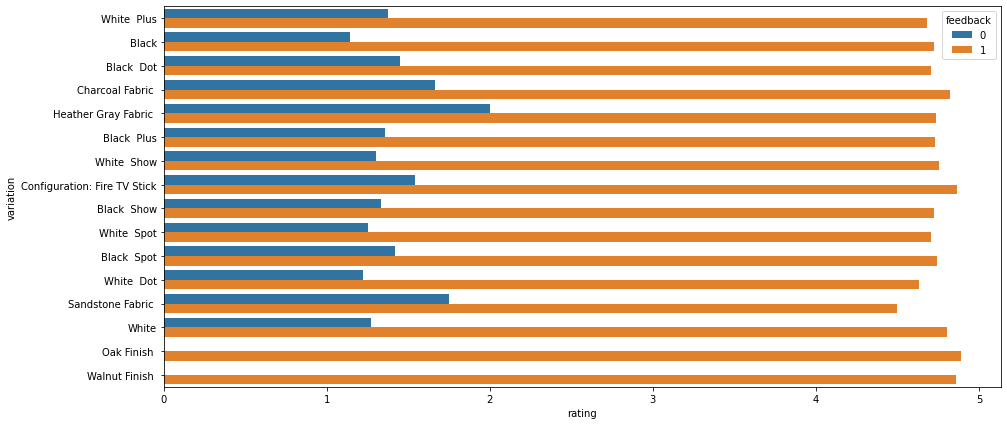

In [7]:
## Rating vs feedback

# set figure size
plt.figure(figsize=(15,7))

# generate countplot
sns.countplot(x="rating", hue="feedback", data=df)

# display plot
plt.show()


## Product rating vs feedback

# set figure size
plt.figure(figsize=(15,7))

# generate barplot
sns.barplot(x="rating", y="variation", hue="feedback", data=df, ci = None)

# display plot
plt.show()

In [9]:
# import packages
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# declare empty list 'corpus'
corpus=[]

# for loop to fill in corpus
for i in range(0,2520):
    # retain alphabets
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)
    

### Model building

- Now let's come to the actual task, using any classifier, predict the `feedback`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html))

In [10]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Instantiate count vectorizer
cv = CountVectorizer(max_features=1500)

# Independent variable
X = cv.fit_transform(corpus).toarray()

# dependent variable
y = df['feedback']

# Counts
count = y.value_counts()
print(count)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

1    2308
0     212
Name: feedback, dtype: int64


In [11]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Instantiate calssifier
rf = RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# display 'score' and 'precision'
print(score, precision)

0.9305555555555556 0.9363449691991786


In [12]:
# import packages
from imblearn.over_sampling import SMOTE

# Instantiate smote
smote = SMOTE(random_state=9)

# fit_sample onm training data
X_train, y_train = smote.fit_sample(X_train, y_train)

# fit modelk on training data
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# calculate the accuracy score
score = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# display precision and score
print(score, precision)

0.8888888888888888 0.9449339207048458


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [13]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Apply the transformations on test
# Converting date attribute from string to datetime.date datatype 
test['date'] = pd.to_datetime(test['date'])

# calculate the total length of word
test['length'] = test['verified_reviews'].apply(len)

# declare empty list 'corpus'
corpus=[]

# for loop to fill in corpus
for i in range(0,630):
    # retain alphabets
    review = re.sub('[^a-zA-Z]', ' ', test['verified_reviews'][i] )
    # convert to lower case
    review=review.lower()
    # tokenize
    review=review.split()
    # initialize stemmer object
    ps=PorterStemmer()
    # perform stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    # join elements of list
    review=' '.join(review)
    # add to 'corpus'
    corpus.append(review)
    
test = cv.transform(corpus).toarray()

# predict on test data
y_pred_test = rf.predict(test)

y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'feedback':y_pred_test})
print(sample_submission.head())

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test.csv',index=False)

# Code ends here

     Id  feedback
0  2887         1
1  1934         1
2   142         1
3  1072         1
4  2258         1
